### BASIC IMAGE PROCESSING IN PYTHON

In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
print ("PACKAGES LOADED.")

PACKAGES LOADED.


#### PRINT CURRENT FOLDER

In [2]:
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) ) 

Current folder is /home/sj/code/notebooks_docker/github/advanced-tensorflow/basic


#### PRINT FUNCTION

In [3]:
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

#### LOAD AN IMAGE

In [4]:
cat = imread("./data/cat.jpg")
print_typeshape(cat)

Type is <type 'numpy.ndarray'>
Shape is (1600, 2400, 3)


#### PLOT LOADED IMAGE

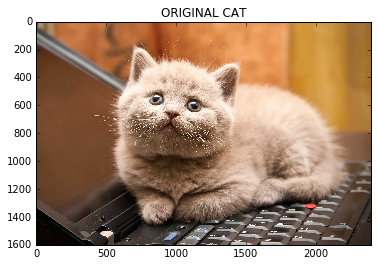

In [ ]:
plt.figure(0)
plt.imshow(cat)
plt.title("ORIGINAL CAT")
plt.draw()

#### LOAD + CAST TO FLOAT?

In [ ]:
# LOAD
cat2 = imread("./data/cat.jpg").astype(np.float)
print_typeshape(cat2)
# PLOT
plt.figure(0)
plt.imshow(cat2)
plt.title("Original Image with imread.astype(np.float)")
plt.draw()

## WHY DOES THIS CAT LOOK SO WEIRD?

#### LOAD + CAST TO FLOAT + NORMALIZE TO 0~1

In [ ]:
# LOAD
cat3 = imread("./data/cat.jpg").astype(np.float)
print_typeshape(cat3)
# PLOT
plt.figure(0)
plt.imshow(cat3/255.)
plt.title("Original Image with imread.astype(np.float)/255.")
plt.draw()

#### RESIZE

In [ ]:
# RESIZE
catsmall = imresize(cat, [100, 100, 3])
print_typeshape(catsmall)
# PLOT
plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.draw()

#### GRAYSCALE

In [ ]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Current Image if GRAY!")
        return rgb

In [ ]:
catsmallgray = rgb2gray(catsmall)
print ("size of catsmallgray is %s" % (catsmallgray.shape,))
print ("type of catsmallgray is", type(catsmallgray))

In [ ]:
plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

#### RESHAPE

In [ ]:
# MATRIX TO VECTOR
catrowvec = np.reshape(catsmallgray, (1, -1));
print ("size of catrowvec is %s" % (catrowvec.shape,))
print ("type of catrowvec is", type(catrowvec))

# VECTOR TO MATRIX
catmatrix = np.reshape(catrowvec, (100, -1));
print ("size of catmatrix is %s" % (catmatrix.shape,))
print ("type of catmatrix is", type(catmatrix))

In [ ]:
plt.imshow(catmatrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()

#### LOAD FROM FOLDER

##### FIRST, SEE WHAT'S INSIDE THE FOLDER

In [ ]:
cwd   = os.getcwd()
path  = cwd + "/img/"
flist = os.listdir(path)
print ("[%d] FILE ARE IN [%s]" % (len(flist), path))

##### LIST UP FILES INSIDE THE FOLDER

In [ ]:
for i, f in enumerate(flist):
    print ("[%d]TH FILE IS [%s]" % (i, f))

##### LOAD IMAGES WITH APPROPRIATE EXTENSIONS

In [ ]:
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgs = []
names = []
for f in flist:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue
    # LOAD AND APPEND TO IMGS LIST
    fullpath = os.path.join(path,f)
    imgs.append(imread(fullpath))
    # APPEND NAMES
    names.append(os.path.splitext(f)[0])

##### PLOT LOADED IMAGES

In [ ]:
for img, name in zip(imgs, names):
    plt.imshow(img)
    plt.title(name)
    plt.show()